In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
df=pd.read_csv("C:/Users/Administrator/Downloads/Dataset .csv")
try:
    print('\n')
    print('DataFrame Loaded Successfully')

except FileNotFoundError:
    print("Error: 'Dataset.csv' named file not found. Please ensure the provided path is correct and directory exists")



DataFrame Loaded Successfully


In [56]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [57]:
target='Aggregate rating'
features=['Restaurant Name', 'Cuisines', 'City', 'Votes']
features

['Restaurant Name', 'Cuisines', 'City', 'Votes']

In [58]:
num_cols=df[features].select_dtypes(include=[np.number]).columns.tolist()
cat_cols=df[features].select_dtypes(include='object').columns.tolist()

In [59]:
num_cols

['Votes']

In [60]:
cat_cols

['Restaurant Name', 'Cuisines', 'City']

In [61]:
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [62]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [63]:
categorical_transformer=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [64]:
categorical_transformer

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [65]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,num_cols),
        ('cat',categorical_transformer,cat_cols)
    ])

In [66]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Votes']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Restaurant Name', 'Cuisines', 'City'])])

In [67]:
X=df[features]
y=df[target]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)
print('\n Data preprocessing done. Data is splitted into training and testing set')


 Data preprocessing done. Data is splitted into training and testing set


In [69]:
models={
    'LinearRegression':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(random_state=42),
    'RandomForest':RandomForestRegressor(n_estimators=50,random_state=42),
    'Gradient Boosting':GradientBoostingRegressor(n_estimators=50,random_state=42)
}   

In [70]:
results={}
for name,model in models.items():
    print(f"\nTraining {name}...")

    pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',model)
    ])

    pipeline.fit(X_train,y_train)

    y_pred=pipeline.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)

    results[name]={
        'MSE':mse,
        'RMSE':rmse,
        'MAE':mae,
        'R2_Score':r2}
    
    print(f"{name} Performance:")
    print(f"Mean Sqaured Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Sqaured Error (RMSE): {rmse:.2f}")
    print(f"R2_Score (R2): {r2:.2f}")


Training LinearRegression...
LinearRegression Performance:
Mean Sqaured Error (MSE): 2.75
Mean Absolute Error (MAE): 1.18
Root Mean Sqaured Error (RMSE): 1.66
R2_Score (R2): -0.21

Training DecisionTree...
DecisionTree Performance:
Mean Sqaured Error (MSE): 0.14
Mean Absolute Error (MAE): 0.24
Root Mean Sqaured Error (RMSE): 0.37
R2_Score (R2): 0.94

Training RandomForest...
RandomForest Performance:
Mean Sqaured Error (MSE): 0.10
Mean Absolute Error (MAE): 0.21
Root Mean Sqaured Error (RMSE): 0.32
R2_Score (R2): 0.95

Training Gradient Boosting...
Gradient Boosting Performance:
Mean Sqaured Error (MSE): 0.11
Mean Absolute Error (MAE): 0.23
Root Mean Sqaured Error (RMSE): 0.34
R2_Score (R2): 0.95



 ---- Feature importance analysis (for tree based models) --- 

Top 10 Most Influential Features (Random Forest):


Votes                                      0.947368
City_New Delhi                             0.003047
City_Noida                                 0.002603
City_Gurgaon                               0.001988
City_Rio de Janeiro                        0.001356
Cuisines_North Indian, Chinese             0.000743
Restaurant Name_Domino's Pizza             0.000680
Cuisines_North Indian, Mughlai, Chinese    0.000578
City_Ghaziabad                             0.000496
City_S��o Paulo                            0.000463
dtype: float64


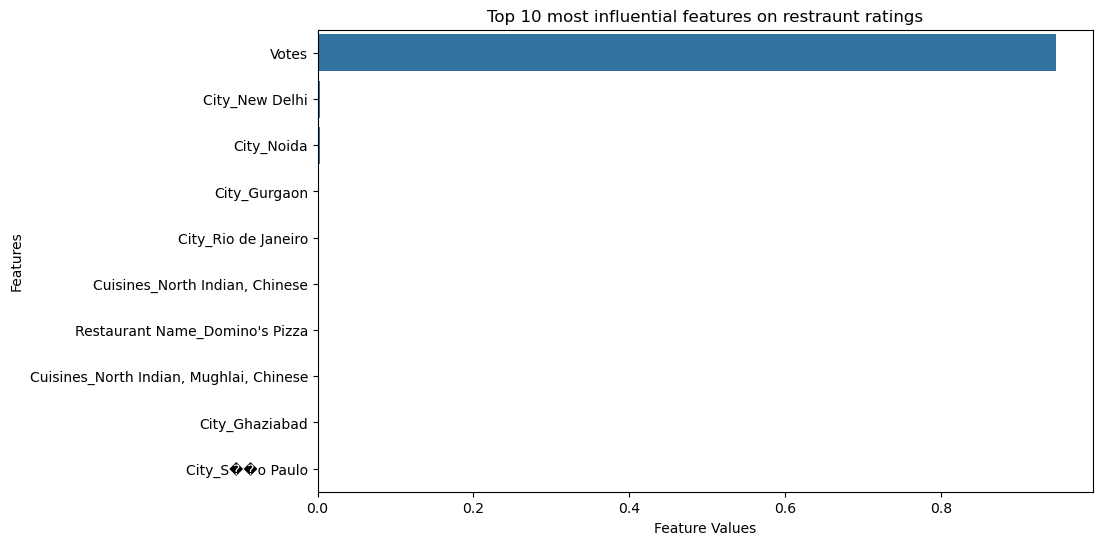

In [71]:
print('\n ---- Feature importance analysis (for tree based models) --- ')
if "RandomForest" in models:
    rf_pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('regressor',RandomForestRegressor(n_estimators=50,random_state=42))
    ])

    rf_pipeline.fit(X_train,y_train)

    if hasattr(rf_pipeline.named_steps['regressor'],'feature_importances_'):
        feature_importances=rf_pipeline.named_steps['regressor'].feature_importances_

        ohe_feature_names=rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)
        feature_names=list(num_cols) + list(ohe_feature_names)

        importance_series=pd.Series(feature_importances,index=feature_names).sort_values(ascending=False)

        print("\nTop 10 Most Influential Features (Random Forest):")
        print('\n')
        print(importance_series.head(10))

        plt.figure(figsize=(10,6))
        sns.barplot(x=importance_series.head(10).values,
                    y=importance_series.head(10).index)
        plt.title('Top 10 most influential features on restraunt ratings')
        plt.xlabel('Feature Values')
        plt.ylabel('Features')
        plt.show()

    else:
        print("Feature importances not available for Random Forest Regressor after pipeline transformation.")


 --- Coefficient Ananlysis for Linear Regression after scaling --- 
Cuisines_Fast Food, South Indian       -7.353407
Restaurant Name_The Big Chill Cakery    7.124517
Restaurant Name_Con�_u                  7.026662
Restaurant Name_Sugar Rush By Saiba     6.874656
Restaurant Name_Kuppies                 6.870996
Restaurant Name_Sweet Tickles           6.803777
Restaurant Name_Sugarama Patisserie     6.799142
Restaurant Name_Bakerz Lodge            6.790520
Restaurant Name_The Sugar Cube          6.755484
Restaurant Name_Bake Me A Cake          6.667794
dtype: float64


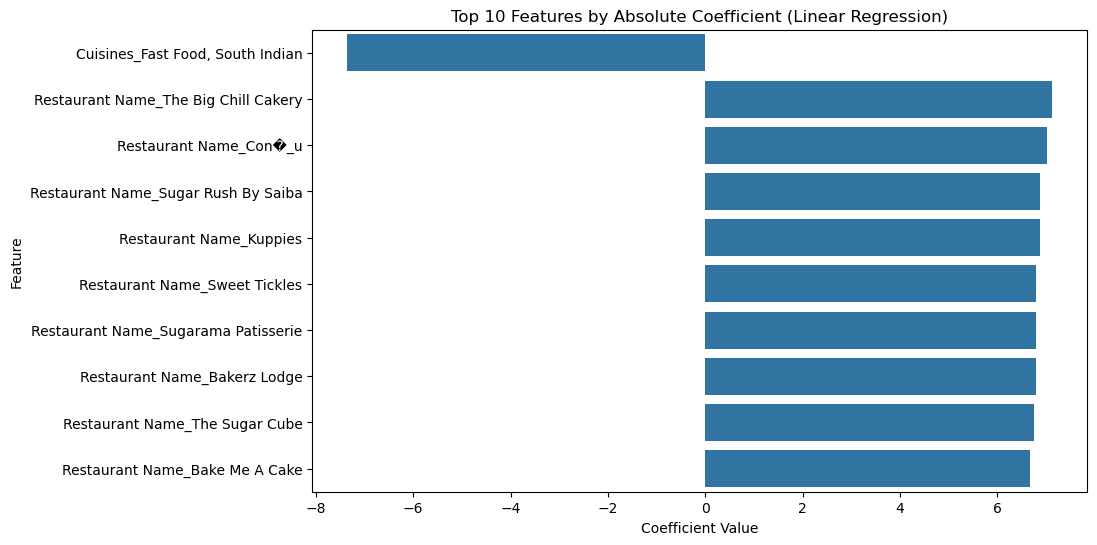


Machine learning model building and analysis complete.


In [72]:
if 'LinearRegression' in models:
    print('\n --- Coefficient Ananlysis for Linear Regression after scaling --- ')
    lr_pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('regressor',LinearRegression())
         ])
    
    lr_pipeline.fit(X_train,y_train)

    coefficients=lr_pipeline.named_steps['regressor'].coef_

    ohe_feature_names=lr_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)
    feature_names=list(num_cols)+list(ohe_feature_names)

    coefficients_series=pd.Series(coefficients,index=feature_names).sort_values(key=abs,ascending=False)
    print(coefficients_series.head(10))

    plt.figure(figsize=(10,6))
    sns.barplot(x=coefficients_series.head(10).values,
                y=coefficients_series.head(10).index)
    plt.title('Top 10 Features by Absolute Coefficient (Linear Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
print("\nMachine learning model building and analysis complete.")

In [73]:
os.makedirs('models',exist_ok=True)

best_model=rf_pipeline

joblib.dump(best_model, 'models/rating_model.pkl')

['models/rating_model.pkl']